In [74]:
import pandas as pd

In [96]:
df=pd.read_csv("retail_sales_dataset.csv")

In [142]:
df.head(5)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Age group
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,30-39
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,20-29
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,40-49
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,30-39
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,20-29


In [98]:
df.tail(5)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150
999,1000,2023-04-12,CUST1000,Male,47,Electronics,4,30,120


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [102]:
#clean data
df.drop_duplicates(inplace=True)

In [15]:

df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [104]:
#cheking for null values
df.isnull().sum()


Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [106]:
#statistics for getting mean, median, std
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [108]:
#modal value for every collumn
df.mode().dropna()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-05-16,CUST001,Female,43.0,Clothing,4.0,50.0,50.0


In [90]:
#sort according to date
df=df.sort_values(by="Date")
df.head(5)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
521,522,2023-01-01,CUST522,Male,46,Beauty,3,500,1500
179,180,2023-01-01,CUST180,Male,41,Clothing,3,300,900
558,559,2023-01-01,CUST559,Female,40,Clothing,4,300,1200
302,303,2023-01-02,CUST303,Male,19,Electronics,3,30,90
978,979,2023-01-02,CUST979,Female,19,Beauty,1,25,25


<function matplotlib.pyplot.show(close=None, block=None)>

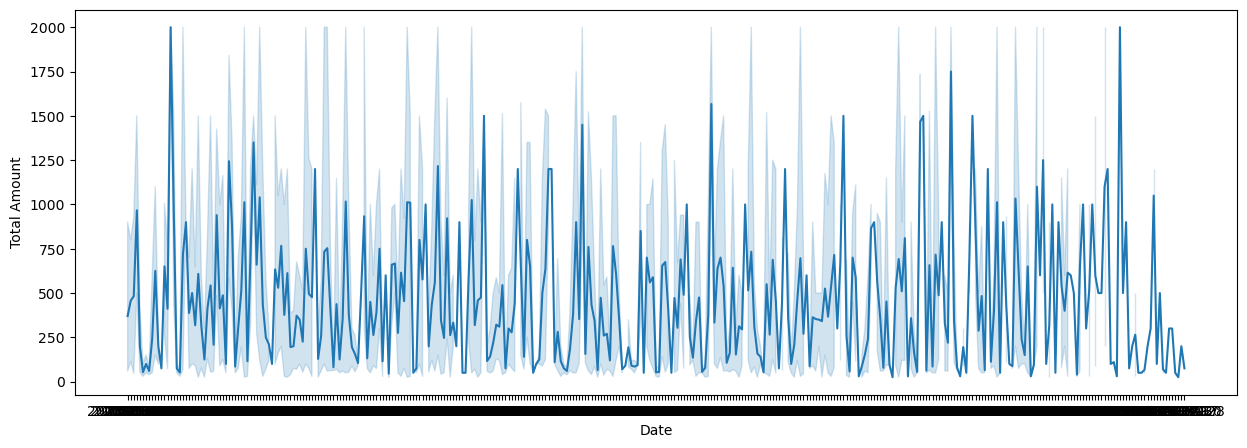

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,5))
sns.lineplot(x="Date",y="Total Amount",data = df)
plt.show

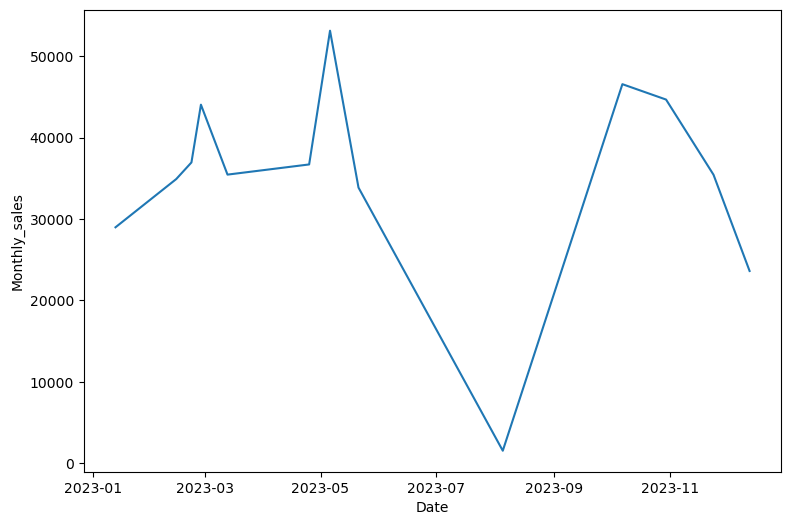

In [113]:
#Time series model

df["Date"]=pd.to_datetime(df["Date"])
#add extra columns

if 'Date' in df.columns:
    # Extract month and year from the 'Date' column
    df["Month"] = df["Date"].dt.month
    df["Year"] = df["Date"].dt.year
else:
    print("Error: 'Date' column does not exist in the DataFrame.")
Monthly_sales=df.groupby(["Year","Month"],as_index=False)["Total Amount"].sum()
df["Monthly_sales"]=Monthly_sales["Total Amount"]
#Total monthly sales for year plot
plt.figure(figsize=(9,6))
sns.lineplot(x="Date",y="Monthly_sales",data=df)
plt.show()

In [114]:
df.head(5)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Month,Year,Monthly_sales
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,11,2023,35450.0
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2,2023,44060.0
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,1,2023,28990.0
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,5,2023,33870.0
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,5,2023,53150.0


In [115]:
#deleting 3 collumns
df=df.drop(["Month","Year","Monthly_sales"],axis=1)
df.head(5)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [116]:
#customer and product analysis

age_bins=[10,20,30,40,50,60]
age_labels=['10-19','20-29','30-39','40-49','50+']
df["Age group"]=pd.cut(df["Age"], bins=age_bins, labels=age_labels,right=True)
Total_amount_by_age=df.groupby("Age group")["Total Amount"].sum()
print(Total_amount_by_age)

Age group
10-19     34730
20-29     98215
30-39     95950
40-49     93795
50+      100085
Name: Total Amount, dtype: int64


C:\Users\PC\AppData\Local\Temp\ipykernel_5416\2058287338.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Total_amount_by_age=df.groupby("Age group")["Total Amount"].sum()


In [117]:
Grouped_data = df.groupby(["Age group","Product Category"])["Total Amount"].sum().reset_index()

C:\Users\PC\AppData\Local\Temp\ipykernel_5416\3904624722.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Grouped_data = df.groupby(["Age group","Product Category"])["Total Amount"].sum().reset_index()


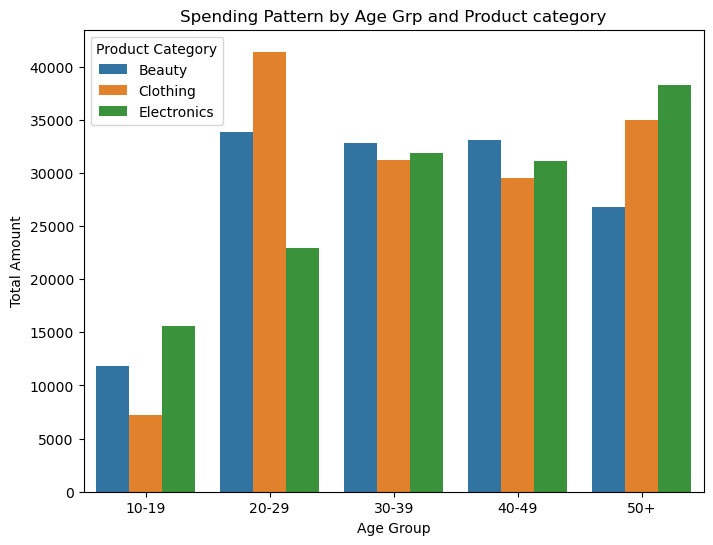

In [118]:
#bar plot to visualize spending by age group and product category
plt.figure(figsize=(8,6))
sns.barplot(x="Age group",y="Total Amount",hue="Product Category",data=Grouped_data)
plt.title("Spending Pattern by Age Grp and Product category")
plt.xlabel("Age Group")
plt.ylabel("Total Amount")
plt.show()

In [119]:
Gender_Totalspend=df.groupby("Gender")["Total Amount"].sum().reset_index()
print(Gender_Totalspend)

   Gender  Total Amount
0  Female        232840
1    Male        223160


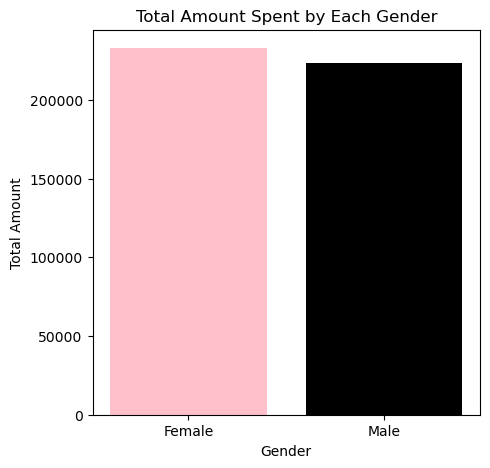

In [120]:
plt.figure(figsize=(5,5))
plt.bar(Gender_Totalspend["Gender"],Gender_Totalspend["Total Amount"],color=["pink","black"])
plt.title("Total Amount Spent by Each Gender")
plt.xlabel("Gender")
plt.ylabel("Total Amount")
plt.show()

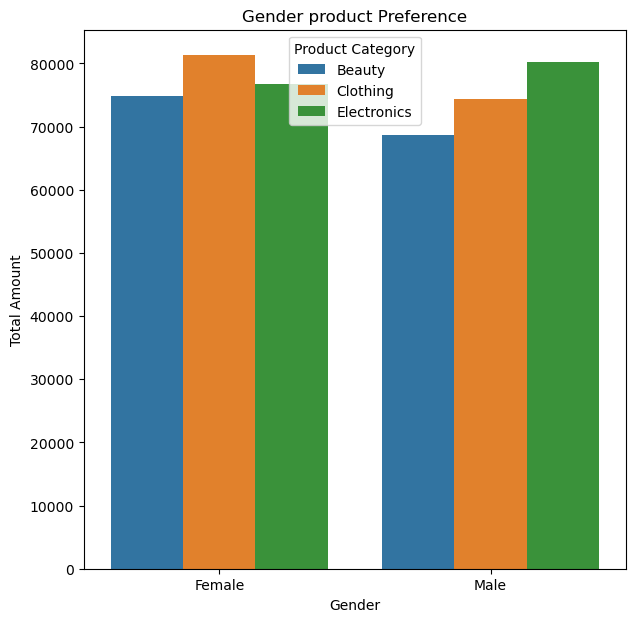

In [121]:
Gender_preference=df.groupby(["Gender","Product Category"])["Total Amount"].sum().reset_index()
plt.figure(figsize=(7,7))
sns.barplot(x="Gender",y="Total Amount",hue="Product Category",data=Gender_preference)
plt.title("Gender product Preference")
plt.xlabel("Gender")
plt.ylabel("Total Amount")
plt.show()

In [122]:
Avg_amount_by_Gender = df.groupby("Gender")["Total Amount"].mean()
print(Avg_amount_by_Gender)

Gender
Female    456.549020
Male      455.428571
Name: Total Amount, dtype: float64


In [123]:
Total_revenue= df.groupby("Product Category")["Total Amount"].sum().reset_index()
print(Total_revenue)

  Product Category  Total Amount
0           Beauty        143515
1         Clothing        155580
2      Electronics        156905


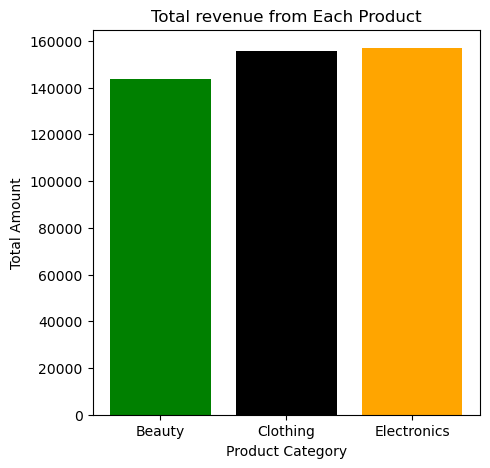

In [124]:
plt.figure(figsize=(5,5))
plt.bar(Total_revenue["Product Category"],Total_revenue["Total Amount"],color=["green","black","orange"])
plt.title("Total revenue from Each Product")
plt.xlabel("Product Category")
plt.ylabel("Total Amount")
plt.show()


In [125]:
Total_num= df.groupby("Product Category")["Quantity"].sum().reset_index()
print(Total_num)

  Product Category  Quantity
0           Beauty       771
1         Clothing       894
2      Electronics       849
